<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project : Predicting Sales - Time Series Analysis and Forecasting
## PART 2/5: Data Cleaning and Exploratory Data Analysis

-------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install googletrans

## 1. Data Cleaning

### 1.01 Custom Functions:

In [2]:
from googletrans import Translator
translator = Translator()
# print(translator.translate("PC - Гарнитуры/Наушники",dest="en").text)

def tranlation(df,col,new_col):
    new_list = []
    for i in df[col]:
        translation = translator.translate(i,dest="en").text
        new_list.append(translation)
    df.loc[:,[new_col]] = new_list


In [3]:
def pre_check(df):
    print(f"null values: \n{df.isnull().sum()}")
    print("--------")
    print(f"datatypes: \n{df.dtypes}")
    print("--------")
    print(f"shape: \n{df.shape}")
    print("--------")
    return df.head()

### 1.02 Import files:

In [4]:
item_cat = pd.read_csv('../dataset/inputs/item_categories.csv')
items = pd.read_csv('../dataset/inputs/items.csv')
items_trans = pd.read_csv('../dataset/inputs/items-translated.csv')
train = pd.read_csv('../dataset/inputs/sales_train.csv')
test = pd.read_csv('../dataset/inputs/test.csv')
shops = pd.read_csv('../dataset/inputs/shops.csv')


### 1.03 Clean "item_cat" file

No null values, datatypes look correct

In [5]:
pre_check(item_cat)

null values: 
item_category_name    0
item_category_id      0
dtype: int64
--------
datatypes: 
item_category_name    object
item_category_id       int64
dtype: object
--------
shape: 
(84, 2)
--------


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


#### Translate item_category_name from Russian to English. Split into categories and sub-categories

In [6]:
tranlation(item_cat,"item_category_name","item_cat_name")
item_cat.head()

,item_category_name,item_category_id,item_cat_name
0,PC - Гарнитуры/Наушники,0,PC - Headsets/Headphones
1,Аксессуары - PS2,1,Accessories - PS2
2,Аксессуары - PS3,2,Accessories - PS3
3,Аксессуары - PS4,3,Accessories - PS4
4,Аксессуары - PSP,4,Accessories - PSP


In [7]:
item_cat["category"] = [word.split('-')[0].rstrip().lower() for word in item_cat["item_cat_name"]]
item_cat["sub-category"] = [word.split('-')[-1].lstrip().rstrip().lower() for word in item_cat["item_cat_name"]]

In [8]:
item_cat["sub-category"].value_counts()

ps3                       3
ps4                       3
psp                       3
psvita                    3
xbox 360                  3
                         ..
comics, manga             1
computer literature       1
postcards                 1
educational literature    1
batteries                 1
Name: sub-category, Length: 68, dtype: int64

In [9]:
item_cat["category"].value_counts()

books                                  13
gifts                                  12
game consoles                           8
games                                   8
accessories                             7
music                                   6
programs                                6
cinema                                  5
payment cards                           4
pc games                                4
service                                 2
blank media (piece)                     1
pure media (spire)                      1
pc                                      1
payment cards (movie, music, games)     1
mac games                               1
android games                           1
delivery of goods                       1
tickets (digital)                       1
batteries                               1
Name: category, dtype: int64

#### Manually correct some entries for tidier aggregation or if the category/sub-category split was not done correctly

In [10]:
# Explore results of category/sub-category split
# item_cat[:20]
item_cat[20:40]
# item_cat[40:60]
# item_cat[60:81]

,item_category_name,item_category_id,item_cat_name,category,sub-category
20,Игры - PS4,20,Games - PS4,games,ps4
21,Игры - PSP,21,Games - PSP,games,psp
22,Игры - PSVita,22,Games - PSVita,games,psvita
23,Игры - XBOX 360,23,Games - XBOX 360,games,xbox 360
24,Игры - XBOX ONE,24,Games - XBOX ONE,games,xbox one
25,Игры - Аксессуары для игр,25,Games - Accessories for games,games,accessories for games
26,Игры Android - Цифра,26,Android Games - Number,android games,number
27,Игры MAC - Цифра,27,MAC Games - Number,mac games,number
28,Игры PC - Дополнительные издания,28,PC Games - Extra Editions,pc games,extra editions
29,Игры PC - Коллекционные издания,29,PC Games - Collector's Editions,pc games,collector's editions


In [11]:
item_cat.loc[item_cat["category"] =="payment cards (movie, music, games)",["category"]] = "payment cards"
item_cat.loc[item_cat["item_cat_name"] =="Payment cards (Movie, Music, Games)",["sub-category"]] = "movie, music,games"
item_cat.loc[item_cat["category"] =="payment cards",:]
item_cat.iloc[37,4] = "blu-ray"
item_cat.iloc[38,4] = "blu-ray 3d"
item_cat.iloc[39,4] = "blu-ray 4k"

In [12]:
#Drop columns that we will not be using
item_cat.drop(labels = ["item_category_name"],axis = 1, inplace = True)
item_cat.head()

,item_category_id,item_cat_name,category,sub-category
0,0,PC - Headsets/Headphones,pc,headsets/headphones
1,1,Accessories - PS2,accessories,ps2
2,2,Accessories - PS3,accessories,ps3
3,3,Accessories - PS4,accessories,ps4
4,4,Accessories - PSP,accessories,psp


### 1.04 Clean "shops" file

In [13]:
pre_check(shops)

null values: 
shop_name    0
shop_id      0
dtype: int64
--------
datatypes: 
shop_name    object
shop_id       int64
dtype: object
--------
shape: 
(60, 2)
--------


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


#### Translate shop_name from Russian to English. Identify "City" from shop_name.

In [14]:
tranlation(shops,"shop_name","shop_name_trans")
shops.head()

,shop_name,shop_id,shop_name_trans
0,"!Якутск Орджоникидзе, 56 фран",0,"!Yakutsk Ordzhonikidze, 56 francs"
1,"!Якутск ТЦ ""Центральный"" фран",1,"!Yakutsk shopping center ""Central"" franc"
2,"Адыгея ТЦ ""Мега""",2,"Adygea shopping center ""Mega"""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRC ""October-Kinomir"""
4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky shopping center ""Volga Mall"""


In [15]:
shops["city"] = shops["shop_name_trans"].apply(lambda x: x.split(" ")[0].replace("!",""))

In [16]:
#Identify names that need to be manually tidied up:
set(shops["city"])

{'Adygea',
 'Balashikha',
 'Chekhov',
 'Digital',
 'E-shop',
 'Kaluga',
 'Kazan',
 'Khimki',
 'Kolomna',
 'Krasnoyarsk',
 'Kursk',
 'Moscow',
 'Mytishchi',
 'N.Novgorod',
 'Novosibirsk',
 'Omsk',
 'Outbound',
 'Rostov-on-Don',
 'SPb',
 'Samara',
 'Sergiev',
 'St.',
 'Surgut',
 'Tomsk',
 'Tyumen',
 'Ufa',
 'Vologda',
 'Volzhsky',
 'Voronezh',
 'Yakutsk',
 'Yaroslavl',
 'Zhukovsky'}

In [17]:
shops.loc[(shops["city"] == "St.")|(shops["city"] == "SPb"),["city"]] = "St. Petersburg"
shops.loc[(shops["city"] == "E-shop")|(shops["city"] == "Digital"),["city"]] = "Online"
shops.loc[(shops["city"] == "Outbound"),["city"]] = "Outbound Trade"
# set(shops["city"])

In [18]:
shops.drop("shop_name",axis = 1,inplace=True)
shops.head()

,shop_id,shop_name_trans,city
0,0,"!Yakutsk Ordzhonikidze, 56 francs",Yakutsk
1,1,"!Yakutsk shopping center ""Central"" franc",Yakutsk
2,2,"Adygea shopping center ""Mega""",Adygea
3,3,"Balashikha TRC ""October-Kinomir""",Balashikha
4,4,"Volzhsky shopping center ""Volga Mall""",Volzhsky


#### Export shops_master for future reference

In [19]:
shops.to_csv("../dataset/intermediate/shops_master.csv")

### 1.05 Clean "items" file

In [20]:
pre_check(items)

null values: 
item_name           0
item_id             0
item_category_id    0
dtype: int64
--------
datatypes: 
item_name           object
item_id              int64
item_category_id     int64
dtype: object
--------
shape: 
(22170, 3)
--------


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Due to the volume of the observations, Google Translate kept timing out. Hence, I have referred to the file that was kindly shared by user Deargle on [Kaggle](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/discussion/54949#latest-554129)

In [21]:
items_trans.head(3)

,item_id,item_name_translated
0,0,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,! ABBYY FineReader 12 Professional Edition Ful...
2,2,*** IN THE GLORY OF THE GLORY (UNV) D


In [22]:
item_cat.head(3)

,item_category_id,item_cat_name,category,sub-category
0,0,PC - Headsets/Headphones,pc,headsets/headphones
1,1,Accessories - PS2,accessories,ps2
2,2,Accessories - PS3,accessories,ps3


#### Merge item and category reference files into one material master reference

In [23]:
item_trans_df = items.merge(items_trans, how = 'inner', on = "item_id")
print(f"shape of item_trans_df = {item_trans_df.shape}")
material_master = item_trans_df.merge(item_cat, how = 'inner', on = "item_category_id")
print(f"material_master = {material_master.shape}")


shape of item_trans_df = (22170, 4)
material_master = (22170, 7)


In [24]:
material_master.drop(labels = "item_name", inplace = True, axis = 1)
material_master

,item_id,item_category_id,item_name_translated,item_cat_name,category,sub-category
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D,Cinema - DVD,cinema,dvd
1,2,40,*** IN THE GLORY OF THE GLORY (UNV) D,Cinema - DVD,cinema,dvd
2,3,40,*** BLUE WAVE (Univ) D,Cinema - DVD,cinema,dvd
3,4,40,*** BOX (GLASS) D,Cinema - DVD,cinema,dvd
4,5,40,*** NEW AMERICAN GRAPHICS (UNI) D,Cinema - DVD,cinema,dvd
...,...,...,...,...,...,...
22165,22095,83,Power supply GP 15AU (LR6) - Blister 2 pcs Ultra,Batteries,batteries,batteries
22166,22096,83,Power supply GP 24A (LR03) - Blister 2 pcs,Batteries,batteries,batteries
22167,22097,83,Power supply GP 24AU (LR03) - Blister 2 pcs Ultra,Batteries,batteries,batteries
22168,22098,83,Power supply COSMOS LR03 2 * BL,Batteries,batteries,batteries


#### Export material_master for future reference

In [25]:
material_master.to_csv("../dataset/intermediate/material_master.csv")

### 1.06 Clean train dataset

In [26]:
pre_check(train)

null values: 
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
--------
datatypes: 
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object
--------
shape: 
(2935849, 6)
--------


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [27]:
train["item_cnt_day"] = train["item_cnt_day"].astype(int)
train["day"] = train["date"].apply(lambda x: x.split(".")[0]).astype(str)
train["month"] = train["date"].apply(lambda x: x.split(".")[1]).astype(str)
train["year"] = train["date"].apply(lambda x: x.split(".")[2]).astype(str)
train["date"] = pd.to_datetime(train[["day","month","year"]])

In [28]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1,02,01,2013
1,2013-01-03,0,25,2552,899.00,1,03,01,2013
2,2013-01-05,0,25,2552,899.00,-1,05,01,2013
3,2013-01-06,0,25,2554,1709.05,1,06,01,2013
4,2013-01-15,0,25,2555,1099.00,1,15,01,2013


#### Check and drop duplicates in train dataset

In [29]:
train.loc[train.duplicated(keep = False) == True, :]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
76961,2013-01-05,0,54,20130,149.0,1,05,01,2013
76962,2013-01-05,0,54,20130,149.0,1,05,01,2013
1435365,2014-02-23,13,50,3423,999.0,1,23,02,2014
1435367,2014-02-23,13,50,3423,999.0,1,23,02,2014
1496765,2014-03-23,14,21,3423,999.0,1,23,03,2014
1496766,2014-03-23,14,21,3423,999.0,1,23,03,2014
1671872,2014-05-01,16,50,3423,999.0,1,01,05,2014
1671873,2014-05-01,16,50,3423,999.0,1,01,05,2014
1866322,2014-07-12,18,25,3423,999.0,1,12,07,2014
1866340,2014-07-12,18,25,3423,999.0,1,12,07,2014


In [30]:
train.drop_duplicates(keep = "first",ignore_index = True, inplace = True)

#### Drop negatives. These are likely to be returns, but we are more interested in Gross Sales for the purpose of deciding how much inventory to supply upfront. 

In [31]:
len(train.loc[train["item_cnt_day"]<0,:])

7356

In [32]:
print(f"number of lines indicating returns = {len(train.loc[train['item_cnt_day']<0,:])}")
print(f"sum of returns = {train.loc[train['item_cnt_day']<0,['item_cnt_day']].sum()}")

number of lines indicating returns = 7356
sum of returns = item_cnt_day   -7541
dtype: int64


In [33]:
train = train.loc[train['item_cnt_day']>=0,:]
train.shape

(2928487, 9)

#### Identify and remove outliers by unit price

In [34]:
train.sort_values(by = "item_price",ascending = False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
1163157,2013-12-13,11,12,6066,307980.0,1,13,12,2013
885137,2013-09-17,8,12,11365,59200.0,1,17,09,2013
1488133,2014-03-20,14,25,13199,50999.0,1,20,03,2014
2327153,2015-01-29,24,12,7241,49782.0,1,29,01,2015
2910150,2015-10-29,33,12,13403,42990.0,1,29,10,2015


In [35]:
train.sort_values(by = "item_price",ascending = True).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
484682,2013-05-15,4,32,2973,-1.0000,1,15,05,2013
608762,2013-06-08,5,58,11865,0.0700,1,08,06,2013
579765,2013-06-11,5,6,11864,0.0700,1,11,06,2013
611399,2013-06-08,5,58,20146,0.0875,4,08,06,2013
673154,2013-07-31,6,6,11872,0.0900,1,31,07,2013


In [36]:
print(f"before = {train.shape}")
train.drop(labels = [1163157,484682], axis = 0, inplace = True)
print(f"after = {train.shape}")

before = (2928487, 9)
after = (2928485, 9)


#### Identify outliers by units sold

##### Aggregate store-item level daily sales into monthly sales

Since we are ultimately forecasting total monthly sales, we will aggregate daily sales into monthly sales before determining outliers

In [37]:
monthly_sum_by_shop_item = train.groupby(["date_block_num","shop_id","item_id"]).agg({"item_cnt_day":"sum"}).reset_index(drop = False)
monthly_sum_by_shop_item.rename({"item_cnt_day":"item_cnt_month"},axis = 1, inplace=True)

65.9% of monthly sales by retail store - item are made of 1 sales count. The remaining 28.3% is made up of store-items with sales of 2-5 monthly units. In total, 94.2% of monthly sales is made up of items with monthly sales of 1-5 units per store, per item.  

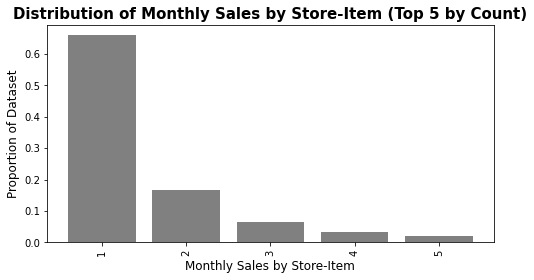

In [38]:
figure, ax = plt.subplots(figsize = (8,4))
monthly_sum_by_shop_item["item_cnt_month"].value_counts(normalize = True).sort_values(ascending = False)[:5].plot(kind="bar",ax = ax, width = 0.8, color = "grey")
ax.set_title("Distribution of Monthly Sales by Store-Item (Top 5 by Count)", fontweight = "heavy", fontsize = 15)
ax.set_ylabel("Proportion of Dataset", fontsize = 12)
ax.set_xlabel("Monthly Sales by Store-Item", fontsize = 12);

In [39]:
#number of monthly sales by store-item beyond mean + 3X standard deviation
msi = monthly_sum_by_shop_item
avg = msi["item_cnt_month"].mean()
std_dev = msi["item_cnt_month"].std()
upper_limit = avg+(3*std_dev)
print(f"number of outliers based on 3X std_dev: {len(msi.loc[msi['item_cnt_month']>upper_limit,:])}")
print(f"sum of outliers based on 3X std_dev: {msi.loc[msi['item_cnt_month']>upper_limit,['item_cnt_month']].sum()}")
print(f"Percentage sum of outliers based on 3X std_dev: {msi.loc[msi['item_cnt_month']>upper_limit,['item_cnt_month']].sum()/msi['item_cnt_month'].sum()}")
msi.loc[msi['item_cnt_month']>upper_limit,['item_cnt_month']].value_counts()

number of outliers based on 3X std_dev: 6875
sum of outliers based on 3X std_dev: item_cnt_month    513737
dtype: int64
Percentage sum of outliers based on 3X std_dev: item_cnt_month    0.140529
dtype: float64


item_cnt_month
29                367
30                335
31                297
32                296
33                248
                 ... 
387                 1
388                 1
396                 1
400                 1
2253                1
Length: 412, dtype: int64

If we remove outliers based on the definition of observations exceeding mean + 3 times the standard deviation, we will be removing 14% of the data. This is not feasible. 

We will revisit outlier management when exploring the test dataset. 

#### Export clean train

In [40]:
basic_train = train.drop(labels = ["day","year","month"],axis = 1)
basic_train.to_csv("../dataset/intermediate/clean_train.csv")

In [41]:
basic_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1
1,2013-01-03,0,25,2552,899.00,1
3,2013-01-06,0,25,2554,1709.05,1
4,2013-01-15,0,25,2555,1099.00,1
5,2013-01-10,0,25,2564,349.00,1


### 1.07 Check test dataset - no cleaning needed

In [42]:
pre_check(test)

null values: 
ID         0
shop_id    0
item_id    0
dtype: int64
--------
datatypes: 
ID         int64
shop_id    int64
item_id    int64
dtype: object
--------
shape: 
(214200, 3)
--------


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


#### Merge Test dataset with Train for visualization purposes

In [43]:
test_eda = test.merge(msi,on = ["shop_id","item_id"], how = "left").fillna(0)
test_eda = test_eda.astype(int)
test_eda.head()

,ID,shop_id,item_id,date_block_num,item_cnt_month
0,0,5,5037,20,1
1,0,5,5037,22,1
2,0,5,5037,23,2
3,0,5,5037,24,2
4,0,5,5037,28,1


### 1.08 Create and Export date_block_mapper

In [44]:
date_mapper = train.groupby(["date_block_num","year","month"])["date"].max().reset_index(drop=False)
date_mapper.set_index("date_block_num",drop=True,inplace=True)
date_mapper = pd.DataFrame(date_mapper)
date_mapper.head()

,year,month,date
date_block_num,,,
0,2013,01,2013-01-31
1,2013,02,2013-02-28
2,2013,03,2013-03-31
3,2013,04,2013-04-30
4,2013,05,2013-05-31


In [45]:
date_mapper.to_csv("../dataset/intermediate/date_master.csv")

## 2. Exploratory Data Analysis

### 2.0 Custom functions:

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decomp(df, title):
    result = seasonal_decompose(df)
    results_df = pd.DataFrame({'trend': result.trend, 
                               'seasonal': result.seasonal, 
                               'resid': result.resid, 
                               'observed': result.observed})
    
    # plot the graphs
    f, ax = plt.subplots(4, 1, sharex=True, figsize=(15, 10))
    
    ax[0].set_title(title, fontsize = 15, fontweight="heavy")
    ax[0].plot(results_df['observed'])
    ax[0].set_xlabel('Observed')
    ax[0].set_ylabel('Value')

    ax[1].plot(results_df['trend'])
    ax[1].set_xlabel('Trend')
    ax[1].set_ylabel('Value')

    ax[2].plot(results_df['seasonal'])
    ax[2].set_xlabel('Seasonality')
    ax[2].set_ylabel('Value')

    ax[3].scatter(results_df.index,results_df['resid'],s = 20)
    ax[3].axhline(0, color = "black", linewidth = 1)
    ax[3].set_xlabel('Residual')
    ax[3].set_ylabel('Value');

In [47]:
def kde_plot(df,col,hue,title,x_label):
    fig, ax = plt.subplots(figsize = (15,5))
    sns.kdeplot(x = df[col], hue = df[hue],ax=ax, fill=True)
    ax.set_title(title, fontsize = 15, fontweight="heavy")
    ax.set_xlabel(x_label, fontsize = 12);


### 2.1 Time-series Plots for Total Sales:

In [48]:
daily_sales = train.groupby("date")[["item_cnt_day"]].sum()
monthly_ttl_sales = daily_sales.resample('M').sum()

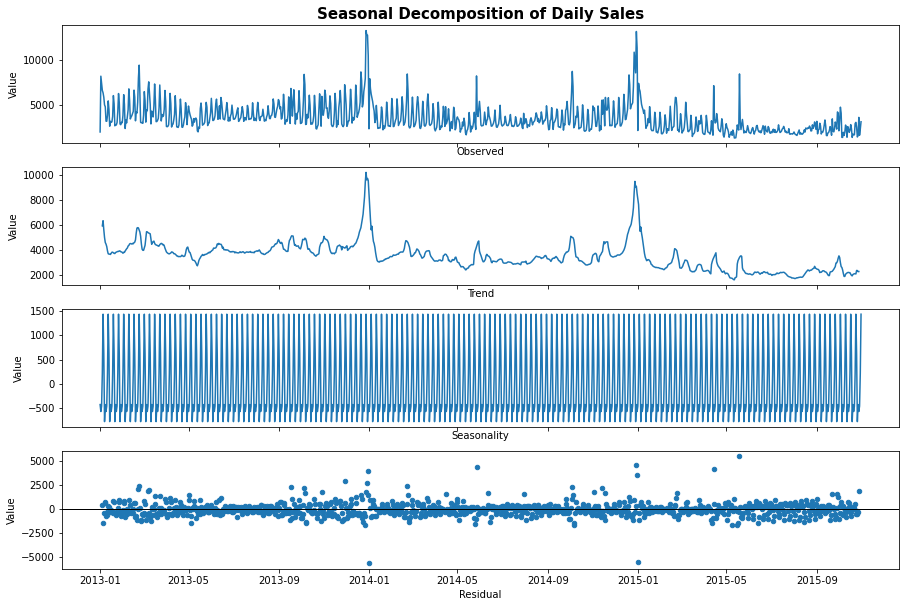

In [49]:
decomp(daily_sales, "Seasonal Decomposition of Daily Sales")

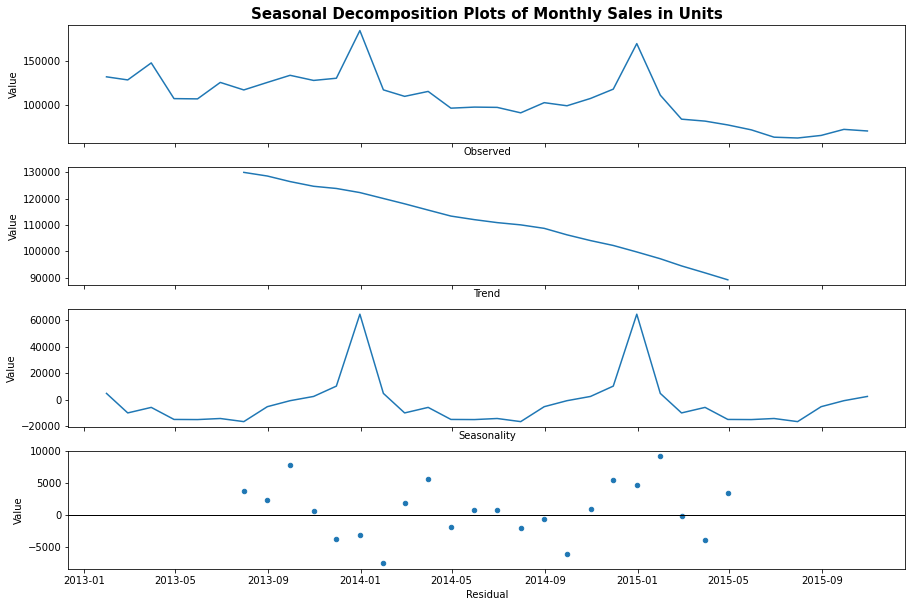

In [50]:
decomp(monthly_ttl_sales, "Seasonal Decomposition Plots of Monthly Sales in Units")

### 2.2 Overview of Annual Revenue and Units Sold 

In [51]:
#Merge train dataset with master data and add revenue column to allow visualisation by city/store/category/revenue
train_item = train.merge(material_master,how = "left",on="item_id")
train_f = train_item.merge(shops,how = "left", on = "shop_id")
train_f["revenue"] = train_f["item_cnt_day"]*train_f["item_price"]
# train_f.head(3)

In [52]:
yearly_item_sum = train_f.groupby(["year","item_name_translated"])[["item_cnt_day","revenue"]].sum().reset_index(drop=False)
yearly_item_count = yearly_item_sum.groupby("year")["item_name_translated"].count().reset_index(drop=False)
yearly_item_count.rename({"item_name_translated":"item_counts"}, axis = 1, inplace = True)
yearly_item_count.head()

,year,item_counts
0,2013,14957
1,2014,14093
2,2015,11242


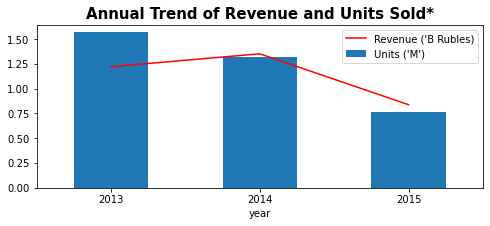

In [53]:
yearly_sum = yearly_item_sum.groupby("year")[["item_cnt_day","revenue"]].sum().reset_index(drop=False)
yearly_sum["item_cnt_day"] = yearly_sum["item_cnt_day"]/1000000
yearly_sum["revenue"] = yearly_sum["revenue"]/1000000000
yearly_sum.rename({"item_cnt_day":"Annual_units ('M)","revenue":"Annual_revenue ('B rubles)"}, axis = 1, inplace = True)
yearly_sum.set_index("year", drop = True, inplace=True)

figure,ax = plt.subplots(figsize = (8,3))
yearly_sum["Annual_units ('M)"].plot(kind = "bar",ax=ax, label = "Units ('M')")
yearly_sum["Annual_revenue ('B rubles)"].plot(color = "red",ax=ax, label = "Revenue ('B Rubles)")
ax.set_title("Annual Trend of Revenue and Units Sold*", fontsize = 15, fontweight = "heavy")
ax.legend();


*Units and Revenue for 2015 are YTD sales

There is a decreasing trend in units sold and number of item counts, but total revenue is increasing year on year. This is likely due to the increase in average selling price of items. 

In [54]:
# Create dataframe for Average Selling Price calculation
train_rev = train.copy()
train_rev["revenue"] = train_rev["item_cnt_day"]*train_rev["item_price"]
train_rev_month = train_rev.groupby("date_block_num")[["item_cnt_day","revenue"]].sum().reset_index(drop=False)
train_rev_month["asp"] = train_rev_month["revenue"]/train_rev_month["item_cnt_day"]
train_rev_month = train_rev_month.merge(date_mapper, how="left",left_index=True,right_index = True)
train_rev_month_d = train_rev_month.loc[:,["asp","date"]].set_index("date",drop=True)
# train_rev_month_d.head()


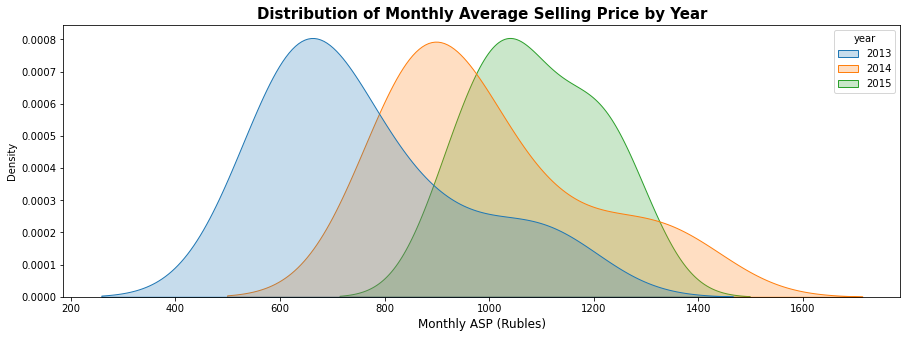

In [55]:
kde_plot(train_rev_month,
         "asp","year",
         "Distribution of Monthly Average Selling Price by Year","Monthly ASP (Rubles)")

Seasonality: ASP peaks in Jan each year, which is similar to the peaks in unit sales. 

Peak in sales coincides with holiday season in Russia. Higher ASP during this period is likely due to conpany's strategy to maximize revenue during peak demand.

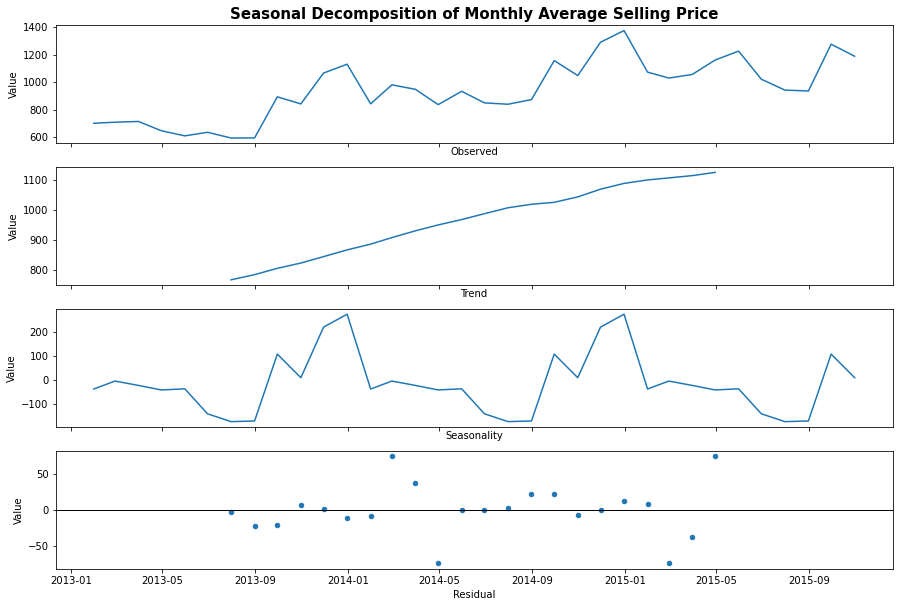

In [56]:
decomp(train_rev_month_d, "Seasonal Decomposition of Monthly Average Selling Price")

### 2.3 Overview of Annual Sales by Store

Total number of stores hover around 53 counts each year, but not the same stores are actively selling each year.

In [57]:
print(f'Total number of cities: {len(set(train_f["city"]))}')

Total number of cities: 30


In [58]:
yearly_stores_wip = train_f.groupby(["year","shop_name_trans","shop_id"])["item_cnt_day"].sum().reset_index(drop=False)
yearly_stores_1 = yearly_stores_wip.groupby("year")["shop_name_trans"].count().reset_index(drop=False)
yearly_stores_1.rename({"shop_name_trans":"store_counts"},axis = 1, inplace = True)
yearly_stores_1.head()

,year,store_counts
0,2013,52
1,2014,53
2,2015,54


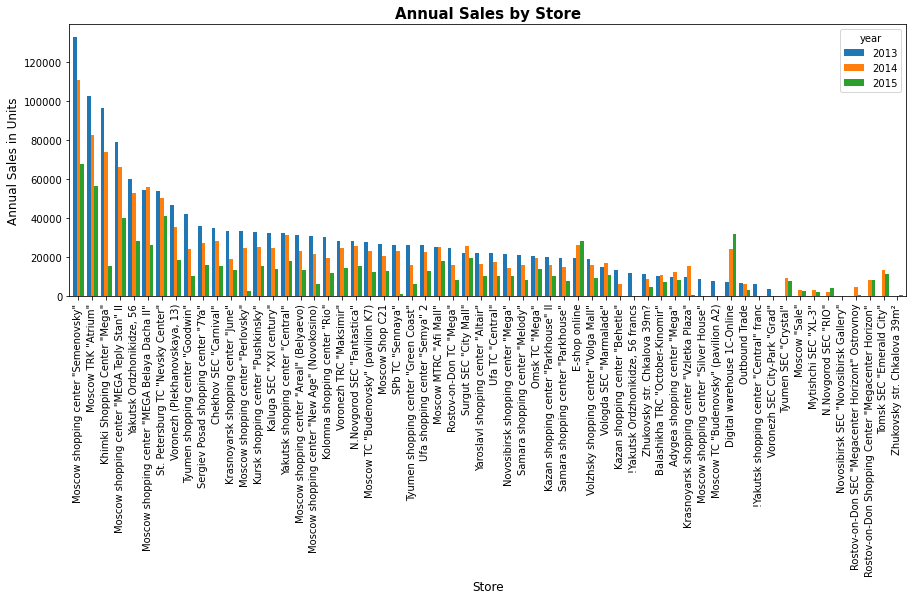

In [59]:
annual_sales_store = pd.crosstab(yearly_stores_wip["shop_name_trans"],yearly_stores_wip["year"],values = yearly_stores_wip["item_cnt_day"],aggfunc = "sum")
figure, ax = plt.subplots(figsize = (15,5))
annual_sales_store.sort_values(by = "2013", ascending = False).plot(kind = 'bar',ax=ax, width = 0.8)
ax.set_title("Annual Sales by Store", fontsize = 15, fontweight = "heavy")
ax.set_ylabel("Annual Sales in Units", fontsize = 12)
ax.set_xlabel("Store",fontsize=12);

We see a trend where there was an increase of stores in between Apr'14 to Sep'14. Subsequently the number of stores began to reduce after Oct'14

In [60]:
# Counts of Stores by Month:
store_sales_mth = train.groupby(["date_block_num","shop_id"])["item_cnt_day"].sum().reset_index(drop=False)
store_count_mth = store_sales_mth.groupby("date_block_num")["shop_id"].count().reset_index(drop=False)
store_count_mth = store_count_mth.merge(date_mapper.reset_index(),how = "left", on = "date_block_num")
# set date as index for seasonal decomp plot
store_count_mth_d = store_count_mth.loc[:,["shop_id","date"]].set_index("date",drop = True)
store_count_mth_d.columns = ["store_count"]

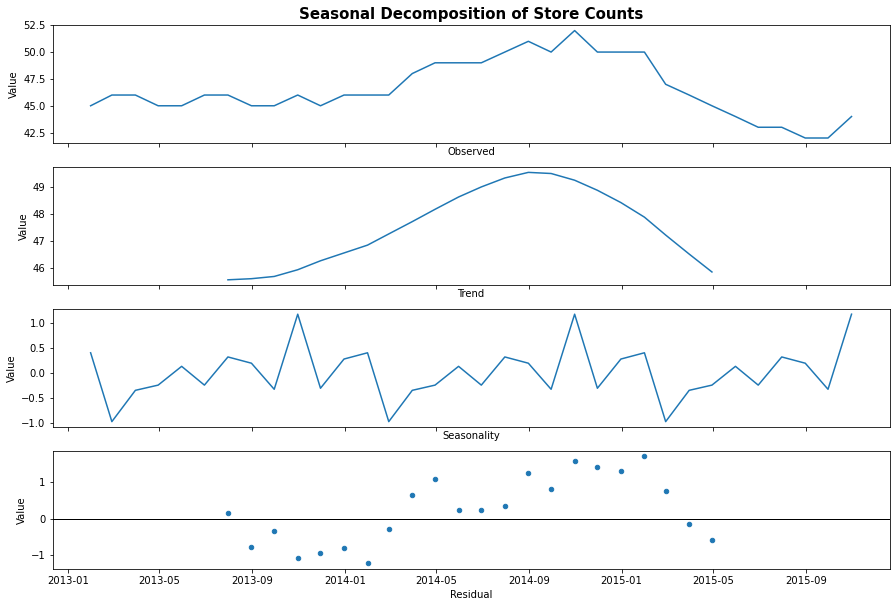

In [61]:
decomp(store_count_mth_d, "Seasonal Decomposition of Store Counts")

Compared to 2013, the average monthly sales per store is higher in 2014. This trend appears to be continuing based on 2015 year-to-date sales.

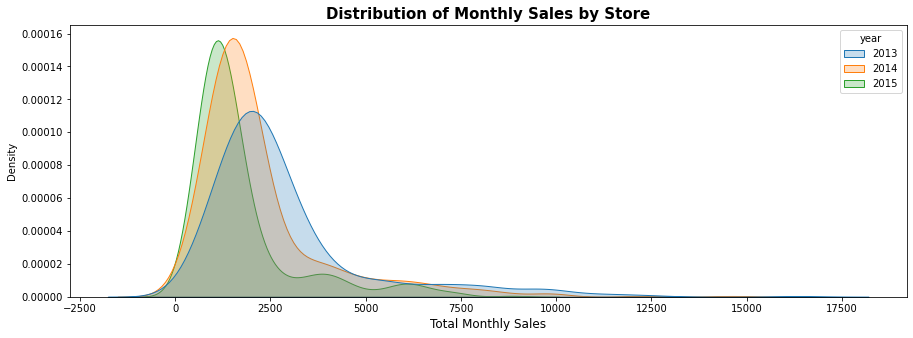

In [62]:
mth_store_sales_sum = train.groupby(["date_block_num","shop_id","year","month"])["item_cnt_day"].sum().reset_index(drop=False)
mth_store_sales_sum.rename({"item_cnt_day":"item_cnt_month"}, axis = 1, inplace=True)
kde_plot(mth_store_sales_sum,"item_cnt_month","year","Distribution of Monthly Sales by Store","Total Monthly Sales")

### 2.4 Overview of Annual Sales by Main Category

The company sells from about 16-18 categories each year. However, the % contribution of each category may differ year to year. For example, 'Cinema' was the leading category in terms of volume in 2013. However, the gap between this category and the next 3 categories narrowed significantly in 2014. 

In [63]:
yearly_category_wip = train_f.groupby(["year","category"])["item_cnt_day"].sum().reset_index(drop=False)
yearly_cat_1 = yearly_category_wip.groupby("year")["category"].count().reset_index(drop=False)
yearly_cat_1.rename({"category":"category_counts"},axis = 1, inplace = True)
yearly_cat_1.head()

,year,category_counts
0,2013,16
1,2014,18
2,2015,18


In [65]:
annual_sales_cat = pd.crosstab(yearly_category_wip["category"],yearly_category_wip["year"],values = yearly_category_wip["item_cnt_day"],aggfunc = "sum")

In [66]:
new_index = annual_sales_cat.sort_values(by = "2013", ascending = False).index

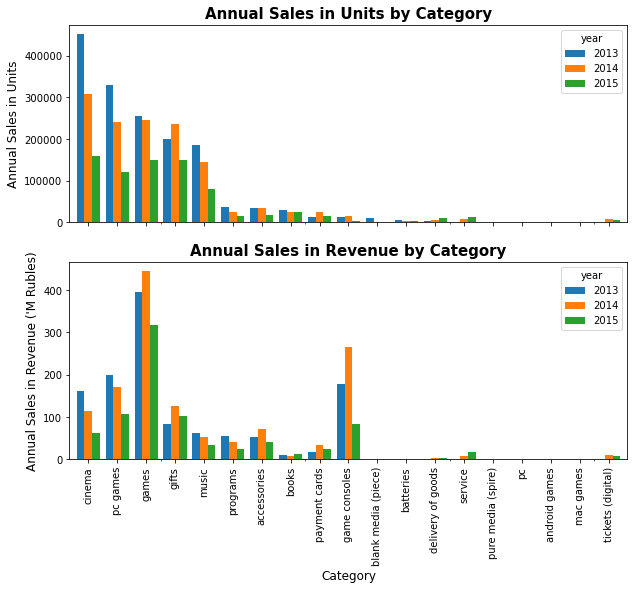

In [67]:
yearly_category_rev = train_f.groupby(["year","category"])["revenue"].sum().reset_index(drop=False)

yearly_category_rev["revenue"] = yearly_category_rev["revenue"]/1000000

annual_rev_cat = pd.crosstab(yearly_category_rev["category"],
                               yearly_category_rev["year"],
                               values = yearly_category_rev["revenue"],aggfunc = "sum")

annual_rev_cat.reindex(new_index)

figure, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False,squeeze=True, figsize = (10,8))
ax = ax.ravel() 

annual_sales_cat.sort_values(by = "2013", ascending = False).plot(kind = 'bar',ax=ax[0], width = 0.8)
ax[0].set_title("Annual Sales in Units by Category", fontsize = 15, fontweight = "heavy")
ax[0].set_ylabel("Annual Sales in Units", fontsize = 12)
ax[0].set_xlabel("Category",fontsize=12);

annual_rev_cat.reindex(new_index).plot(kind = 'bar',ax=ax[1], width = 0.8)
ax[1].set_title("Annual Sales in Revenue by Category", fontsize = 15, fontweight = "heavy")
ax[1].set_ylabel("Annual Sales in Revenue ('M Rubles)", fontsize = 12)
ax[1].set_xlabel("Category",fontsize=12);

While games rank third in terms of volume, it ranks first in terms of revenue contribution. 

Game Consoles rank 10th in terms of volume, but due to its extremely high value, ranks 3rd in terms of revenue contribution. 

### 2.5 Distribution of Categories Sold by Year:

In [68]:
category_count_year = train_f.groupby(["year","category"])["item_cnt_day"].sum().reset_index(drop=False)
sub_category_count_year = train_f.groupby(["year","sub-category"])["item_cnt_day"].sum().reset_index(drop=False)
item_count_year = train_f.groupby(["year","item_id"])["item_cnt_day"].sum().reset_index(drop=False)

In [69]:
cat_counts = pd.DataFrame(category_count_year["year"].value_counts())
cat_counts.rename({"year":"cat_counts"}, axis = 1, inplace = True)

In [70]:
sub_cat_counts = pd.DataFrame(sub_category_count_year["year"].value_counts())
sub_cat_counts.rename({"year":"sub_cat_counts"}, axis = 1, inplace = True)

In [71]:
item_counts = pd.DataFrame(item_count_year["year"].value_counts())
item_counts.rename({"year":"item_counts"}, axis = 1, inplace = True)

In [72]:
cat_counts

,cat_counts
2014,18
2015,18
2013,16


In [73]:
sub_cat_counts

,sub_cat_counts
2015,60
2014,59
2013,57


In [74]:
item_counts

,item_counts
2013,14967
2014,14105
2015,11245


In [75]:
# Count of Categories sold by Store by Month
store_cat_sales = train_f.groupby(["date_block_num","shop_id","category"])["item_cnt_day"].sum().reset_index(drop=False)
store_cat_count = store_cat_sales.groupby(["date_block_num","shop_id"])["category"].count().reset_index(drop=False)
store_cat_count = store_cat_count.merge(date_mapper.reset_index(),how = "left", on = "date_block_num")
store_cat_count.rename({"category":"num_of_cats"}, axis = 1, inplace = True)


Not all stores carry the same assortment, and can sell different number of categories at different times of the year. 

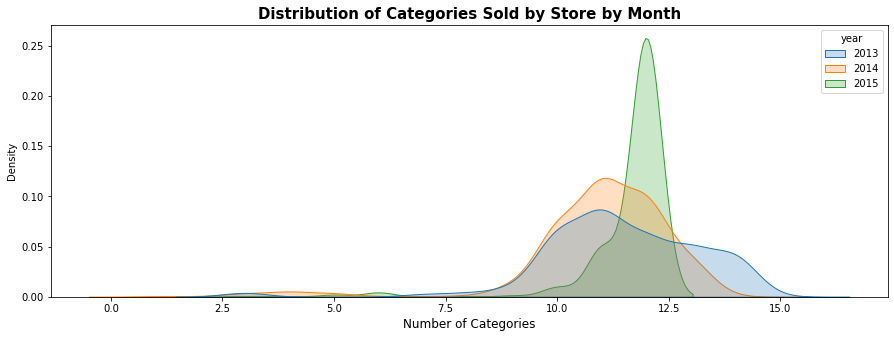

In [76]:
kde_plot(store_cat_count,"num_of_cats","year","Distribution of Categories Sold by Store by Month","Number of Categories")

The number of unique item counts sold per store also appears to be reducing year on year. This might be a result of the company attempting to trim tail-end products for the sake of supply-chain efficiency.

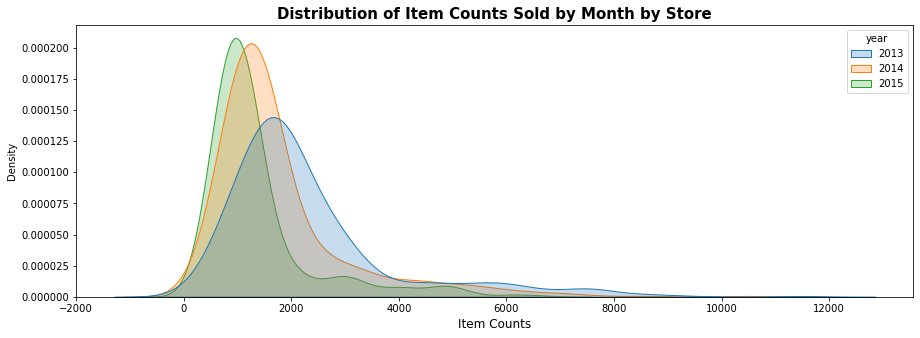

In [77]:
mth_store_item_count = train.groupby(["date_block_num","shop_id","year","month"])["item_cnt_day"].count().reset_index(drop=False)
kde_plot(mth_store_item_count,"item_cnt_day","year","Distribution of Item Counts Sold by Month by Store","Item Counts")

We can also observe seasonality in terms of Items Counts sold per store: Number of item counts sold per store peaks in Jan each year, consistent with the seasonality observed for total overall sales.

In other words: the increase in sales in Jan each year is driven by more types of items being sold in that month

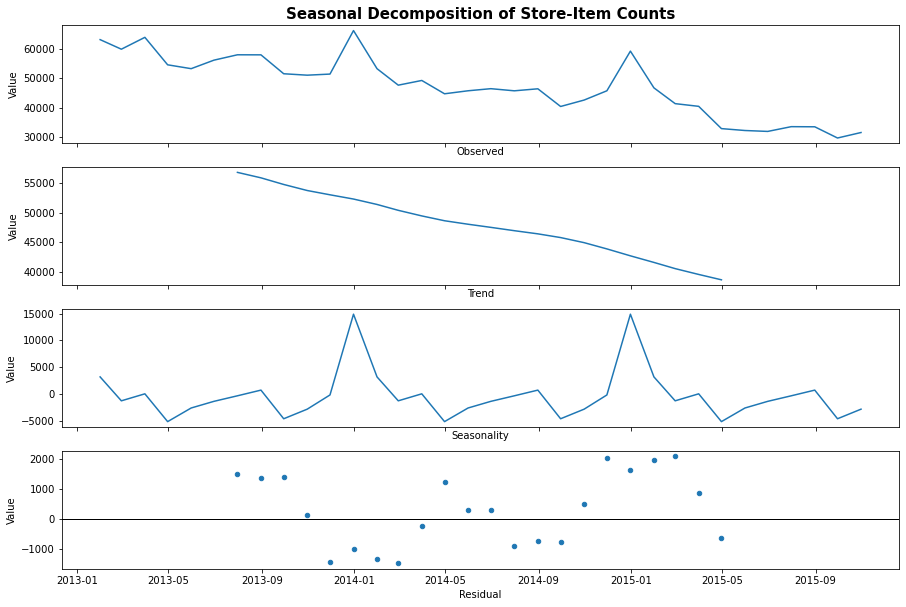

In [78]:
# Store-Item Counts by Month:
store_item_sales_mth = train.groupby(["date_block_num","shop_id","item_id"])["item_cnt_day"].sum().reset_index(drop=False)
store_item_count_mth = store_item_sales_mth.groupby("date_block_num")["item_id"].count().reset_index(drop=False)
store_item_count_mth.set_index(keys = "date_block_num", drop=True,inplace=True)
store_item_count_mth = store_item_count_mth.merge(date_mapper["date"], how="left",left_index=True,right_index = True)
store_item_count_mth.set_index(keys = "date", drop=True,inplace=True)

decomp(store_item_count_mth, "Seasonal Decomposition of Store-Item Counts")

### 2.6 Profile of Test dataset

In [79]:
test_cat = test.merge(material_master,how = "left",on="item_id")
test_cat.head(3)

,ID,shop_id,item_id,item_category_id,item_name_translated,item_cat_name,category,sub-category
0,0,5,5037,19,"NHL 15 [PS3, Russian subtitles]",Games - PS3,games,ps3
1,1,5,5320,55,ONE DIRECTION Made In The A.M.,Music - locally produced CD,music,locally produced cd
2,2,5,5233,19,"Need for Speed Rivals (Essentials) [PS3, русск...",Games - PS3,games,ps3


In [80]:
print(f'Number of shops in test sample: {len(set(test["shop_id"]))}')
print(f'Number of item counts in test sample: {len(set(test["item_id"]))}')
print(f'Number of main categories in test sample: {len(set(test_cat["category"]))}')
print(f'Number of sub categories in test sample: {len(set(test_cat["sub-category"]))}')

Number of shops in test sample: 42
Number of item counts in test sample: 5100
Number of main categories in test sample: 16
Number of sub categories in test sample: 51


In [81]:
# pivot data from train dataset for merging into test dataset
mth_item_store_sales = train_f.groupby(["year","month","shop_id","item_id"])["item_cnt_day"].sum().reset_index(drop=False)
nov_only = mth_item_store_sales.loc[mth_item_store_sales["month"] == "11",["year","shop_id","item_id","item_cnt_day"]]
nov_only_annual = pd.crosstab([nov_only["shop_id"],nov_only["item_id"]],
                              nov_only["year"],
                              values = nov_only["item_cnt_day"],
                              aggfunc=sum).reset_index(drop=False).fillna(0)
nov_only_annual.astype(int).head(3)

year,shop_id,item_id,2013,2014
0,2,33,2,0
1,2,97,1,0
2,2,482,2,0


In [82]:
test_history = test.merge(nov_only_annual,how="left",on = ["shop_id","item_id"])
test_history.head(3)

,ID,shop_id,item_id,2013,2014
0,0,5,5037,0.0,1.0
1,1,5,5320,NaN,NaN
2,2,5,5233,NaN,NaN


**The challenge:** 
* 86% of the store-item combinations do not exist in the train dataset. This means there is no historical data to predict future sales at this specific level of disaggregation. 
* Only 2% of the store-items in the test sample have historical data from both 2013-2014
* 8% of the test dataset has historical data from 2014 but not 2013
* 3% of the test dataset has historical data from 2013 but not 2014

In [83]:
print(f'Number of test samples with no historical data at store-item level = {test_history["2013"].isnull().sum()}')
print(f'Number of test samples with only 2013 historical data = {len(test_history.loc[(test_history["2014"] ==0) & (test_history["2013"] >0), :])}')
print(f'Number of test samples with only 2014 historical data = {len(test_history.loc[(test_history["2013"] ==0) & (test_history["2014"] >0), :])}')
print(f'Number of test samples with complete historical data = {len(test_history.loc[(test_history["2013"]>0) & (test_history["2014"] >0), :])}')

Number of test samples with no historical data at store-item level = 184366
Number of test samples with only 2013 historical data = 7410
Number of test samples with only 2014 historical data = 17514
Number of test samples with complete historical data = 4910


In [84]:
#check number of rows add up to length of test set:
17514 + 4910 + 7410 + 184366

214200

In [85]:
print(f'Sum of sales in 2013 for items captured in test set = {test_history["2013"].sum()}')
print(f'Sum of sales in 2014 for items captured in test set = {test_history["2014"].sum()}')

Sum of sales in 2013 for items captured in test set = 44524.0
Sum of sales in 2014 for items captured in test set = 69459.0


In [86]:
test_history.to_csv("../dataset/intermediate/submission_template.csv")

#### Baseline score is based on average of Nov'13 and Nov'14 sales for store-items in the test set, equally distributed across all samples

In [76]:
submission = pd.read_csv("../dataset/inputs/sample_submission.csv", index_col = [0])
submission["item_cnt_month"] = (test_history.loc[:,["2013","2014"]].sum().sum()/2)/len(test)
submission.head()

,item_cnt_month
ID,
0,0.266067
1,0.266067
2,0.266067
3,0.266067
4,0.266067


In [77]:
submission.to_csv("../dataset/outputs/baseline.csv")

<img src="../images/baseline_score.png"
     alt="kaggle_score"
     style="float: left; margin-right: 10px;" />

**The baseline (RMSE) score is 1.21756**